**Анализ зарплат спортивного тренера с hh.ru**

In [4]:
import requests
from bs4 import BeautifulSoup
import re

url = 'https://hh.ru/search/vacancy?ored_clusters=true&hhtmFrom=vacancy_search_list&hhtmFromLabel=vacancy_search_line&enable_snippets=false&area=1&professional_role=138&search_field=name&text=%D1%81%D0%BF%D0%BE%D1%80%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9+%D1%82%D1%80%D0%B5%D0%BD%D0%B5%D1%80'
response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})  #избегаем ошибки 403, это подсказал GPT
soup = BeautifulSoup(response.content, 'html.parser')

salary_elements = soup.find_all('span', class_=re.compile(r'magritte-text.*typography-label-1-regular')) #находим зарплаты на странице
salaries = []

def process_salary(salary_text): #функция, которая принимает на вход кусок текста с зарплатой в странном формате и возвращает нормальное число
    salary_text = salary_text.replace('\u202f', '').replace('\xa0', ' ') #преобразует числа в нормальный вид (из гпт)
    numbers = re.findall(r'\d+', salary_text) #ищет все числа в строке
    numbers = list(map(int, numbers))
    if len(numbers) == 2:
        salary = sum(numbers) / 2 #если в одном эелменте два числа (т. е. диапазон зарплат), считаем среднее арифметическое
    else:
        salary = numbers[0]
    if "налогов" in salary_text:
        salary *= 0.87 #если есть слово "налогов", вычитаем 13% (НДФЛ), так как это значит, что там была фраза "до вычета налогов"

    return int(salary)

for element in salary_elements:
    salary_text = element.get_text()
    processed_salary = process_salary(salary_text)
    salaries.append(processed_salary)
print(salaries)

[80000, 80000, 80000, 80000, 225000, 225000, 130500, 130500, 97500, 97500, 52500, 52500, 120000, 120000, 175000, 175000, 104400, 104400, 97500, 97500, 135000, 135000, 47676, 47676, 97500, 97500, 150000, 150000, 97500, 97500, 47676, 47676, 150000, 150000]


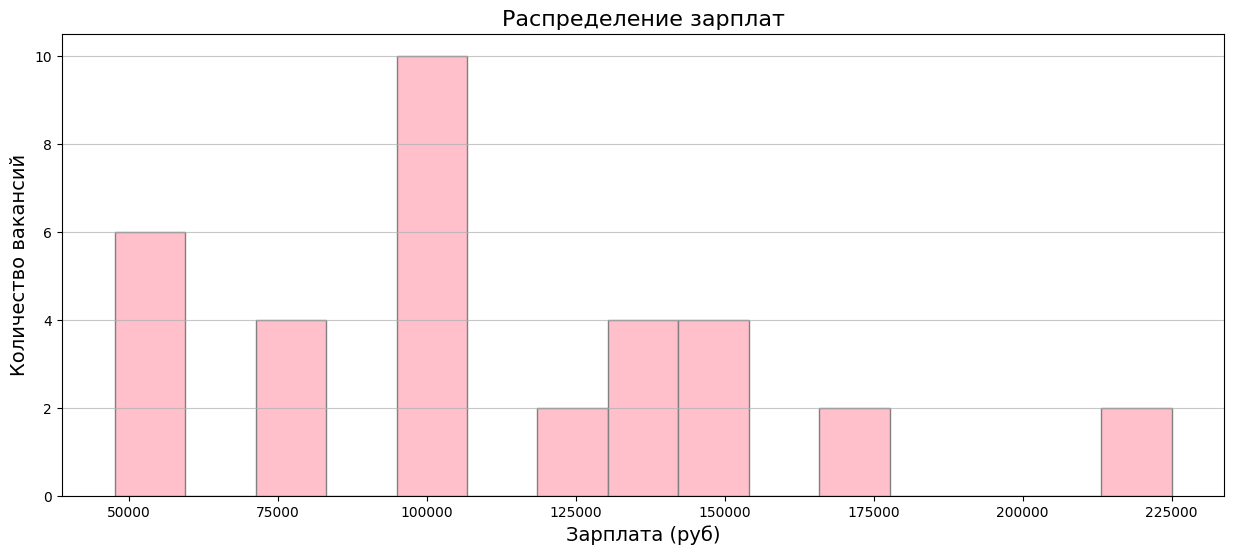

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15, 6))
plt.hist(salaries, bins=15, color='pink', edgecolor='gray', alpha=1)

plt.title('Распределение зарплат', fontsize=16)
plt.xlabel('Зарплата (руб)', fontsize=14)
plt.ylabel('Количество вакансий', fontsize=14)
plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.show()

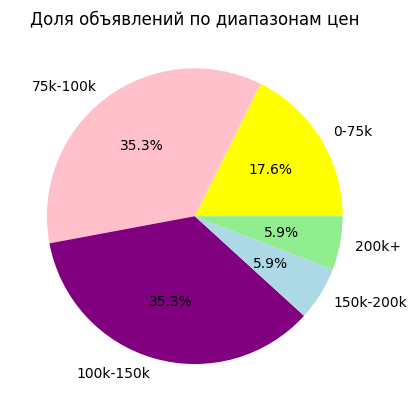

In [3]:
salaries_ranges = ['0-75k', '75k-100k', '100k-150k', '150k-200k', '200k+']
counts = [
    len([x for x in salaries if x <= 75000]),
    len([x for x in salaries if 75000 < x <= 100000]),
    len([x for x in salaries if 100000 < x <= 150000]),
    len([x for x in salaries if 150000 < x <= 200000]),
    len([x for x in salaries if x > 200000])
]
plt.pie(counts, labels=salaries_ranges, autopct='%1.1f%%', colors=['yellow', 'pink', 'purple', 'lightblue', 'lightgreen']) #из гпт
plt.title('Доля объявлений по диапазонам цен')
plt.show()

In [ ]:
#Вывод: мы будем тратить на спортивного тренера около 100-150k в месяц, это нормлаьная цена для рынка. Если захотим кого-то более опытного, будем тратить от 150k